In [1]:
# To find out Demand and suplly zones using Volumes

In [2]:
# Start by importing NumPy and vectorbt. You’ll use SciPy to test the statistical significance of the results.
import numpy as np
import scipy.stats as stats
import pandas as pd
import warnings
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
warnings.simplefilter('ignore', FutureWarning)
from iexfinance.stocks import get_historical_data
import pandas_datareader as pdr

In [21]:
import pandas as pd
from datetime import datetime
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data

# Define the API key
IEX_CLOUD_API_TOKEN = ''

# Define the start and end date
start_date = datetime(2023, 1, 15)
# Define the symbol
symbol = 'AAPL'

# Download the historical data
price = get_historical_data(symbol, start=start_date, end=None, output_format='pandas', token=IEX_CLOUD_API_TOKEN)

# Print the DataFrame
print(price)

             close     high       low     open   priceDate symbol    volume   
2023-01-17  135.94   137.29    134.13   134.83  2023-01-17   AAPL  63646627  \
2023-01-18  135.21   138.61    135.03  136.815  2023-01-18   AAPL  69672800   
2023-01-19  135.27   136.25    133.77   134.08  2023-01-19   AAPL  58280413   
2023-01-20  137.87   138.02    134.22   135.28  2023-01-20   AAPL  80223626   
2023-01-23  141.11  143.315     137.9   138.12  2023-01-23   AAPL  81760313   
...            ...      ...       ...      ...         ...    ...       ...   
2023-04-24  165.33    165.6    163.89      165  2023-04-24   AAPL  41949581   
2023-04-25  163.77  166.305    163.73   165.19  2023-04-25   AAPL  48714063   
2023-04-26  163.76   165.28     162.8  163.055  2023-04-26   AAPL  45498796   
2023-04-27  168.41   168.56    165.19   165.19  2023-04-27   AAPL  64902329   
2023-04-28  169.68   169.85  167.8801   168.49  2023-04-28   AAPL  55275851   

                           id   key subkey  ...    

In [23]:
price["close-Prev_close"]= price['close']-price["close"].shift(-1)
price["open-Prev_open"]= price['open']-price["open"].shift(-1)
price["high-Prev_high"]= price['high']-price["high"].shift(-1)
price["low-Prev_low"]= price['low']-price["low"].shift(-1)
price["close-open"]= price["close"] -price["open"]

price['vol/close-Prev_close']= price["volume"]/(price["close-Prev_close"])
price["vol/open-Prev_open"] =price["volume"]/(price["open-Prev_open"])
price["vol/high-Prev_high"] = price["volume"]/(price["high-Prev_high"])
price["vol/low-Prev_low"] = price["volume"]/(price["low-Prev_low"])
price["vol/close-open"] = price["volume"]/(price["close-open"])

In [24]:
price

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,open-Prev_open,hig-Prev_high,low-Prev_low,close-open,vol/close-Prev_close,vol/open-Prev_open,high-Prev_high,vol/high-Prev_high,vol/low-Prev_low,vol/close-open
2023-01-17,135.94,137.29,134.13,134.83,2023-01-17,AAPL,63646627,HISTORICAL_PRICES,AAPL,,...,-1.985,-1.32,-0.9,1.11,87187160.273974,-32063791.939547,-1.32,-48217141.666666,-70718474.444444,57339303.603604
2023-01-18,135.21,138.61,135.03,136.815,2023-01-18,AAPL,69672800,HISTORICAL_PRICES,AAPL,,...,2.735,2.36,1.26,-1.605,-1161213333.333289,25474515.539305,2.36,29522372.881356,55295873.015873,-43409844.23676
2023-01-19,135.27,136.25,133.77,134.08,2023-01-19,AAPL,58280413,HISTORICAL_PRICES,AAPL,,...,-1.2,-1.77,-0.45,1.19,-22415543.461539,-48567010.833334,-1.77,-32926787.00565,-129512028.888892,48975136.97479
2023-01-20,137.87,138.02,134.22,135.28,2023-01-20,AAPL,80223626,HISTORICAL_PRICES,AAPL,,...,-2.84,-5.295,-3.68,2.59,-24760378.395062,-28247755.633803,-5.295,-15150826.440038,-21799898.369565,30974372.972973
2023-01-23,141.11,143.315,137.9,138.12,2023-01-23,AAPL,81760313,HISTORICAL_PRICES,AAPL,,...,-2.185,0.155,-2.4,2.99,-57577685.211268,-37418907.551487,0.155,527485890.322577,-34066797.083333,27344586.287625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,165.33,165.6,163.89,165,2023-04-24,AAPL,41949581,HISTORICAL_PRICES,AAPL,,...,-0.19,-0.705,0.16,0.33,26890757.051282,-220787268.421055,-0.705,-59502951.773049,262184881.250006,127119942.424238
2023-04-25,163.77,166.305,163.73,165.19,2023-04-25,AAPL,48714063,HISTORICAL_PRICES,AAPL,,...,2.135,1.025,0.93,-1.42,4871406299.990585,22816891.334895,1.025,47525915.121951,52380712.903227,-34305678.169014
2023-04-26,163.76,165.28,162.8,163.055,2023-04-26,AAPL,45498796,HISTORICAL_PRICES,AAPL,,...,-2.135,-3.28,-2.39,0.705,-9784687.311828,-21310911.47541,-3.28,-13871584.146341,-19037153.138075,64537299.290782
2023-04-27,168.41,168.56,165.19,165.19,2023-04-27,AAPL,64902329,HISTORICAL_PRICES,AAPL,,...,-3.3,-1.29,-2.6901,3.22,-51104196.062992,-19667372.424242,-1.29,-50311882.945737,-24126362.960485,20156002.795031


<Axes: >

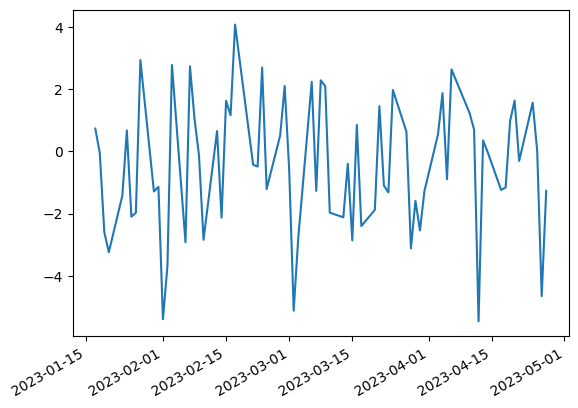

In [30]:
price["close-Prev_close"].plot()

<Axes: >

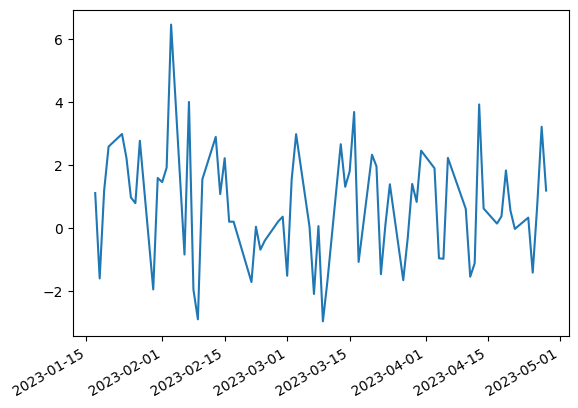

In [28]:
price["close-open"].plot()

<Axes: >

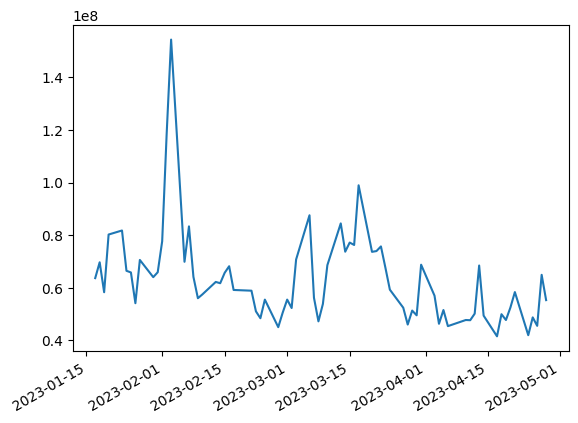

In [27]:
price["volume"].plot()

In [1]:
#for i in range(len(price)):
#    if price["close-Prev_close"][i] > 0.0 and price["close-open"][i] >  0.0 and price['vol/close-open'][i] >200000:
#        print("Buy @ {} ".format(price["close"]))
#    else:
#        print("SEll @ {}  ".format(price["close"]))

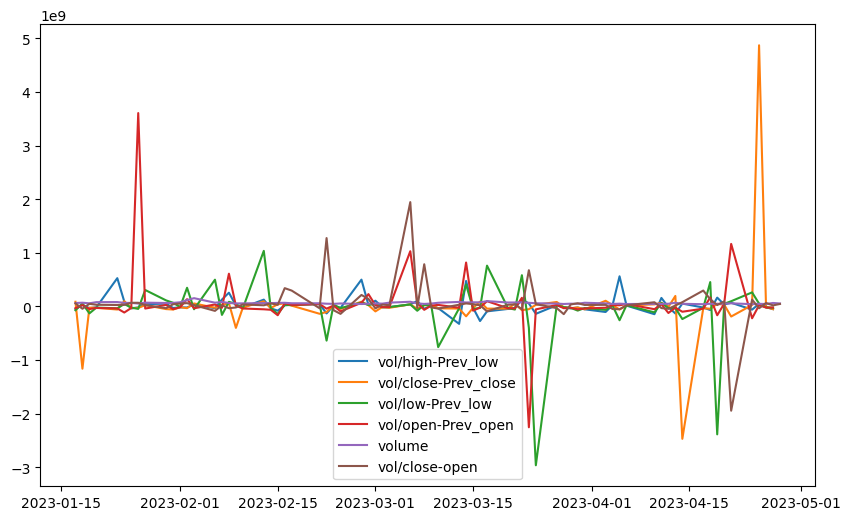

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot both variables on the same plot
ax.plot(price["vol/high-Prev_high"], label='vol/high-Prev_low')
ax.plot(price['vol/close-Prev_close'], label='vol/close-Prev_close')
ax.plot(price['vol/low-Prev_low'], label='vol/low-Prev_low')
ax.plot(price['vol/open-Prev_open'], label='vol/open-Prev_open')
ax.plot(price["volume"], label='volume')
ax.plot(price["vol/close-open"], label='vol/close-open')
ax.legend() 
plt.show()

In [42]:
k=price["vol/close-Prev_close"].sort_values(ascending=False) # Good to go long on the having high positive values 
k.tail(20)

2023-03-21      50991920.689656
2023-02-03      55724670.397112
2023-02-16      58765467.241379
2023-02-08      61066741.904763
2023-04-11      68063167.142855
2023-03-27      83159152.380953
2023-01-17      87187160.273974
2023-02-27      88232294.117649
2023-03-16      89711081.176471
2023-02-13      95690789.230768
2023-01-24      99156928.358211
2023-04-03     105511457.407409
2023-04-13      195558997.14286
2023-04-25    4871406299.990585
2023-04-28                  NaN
Name: vol/close-Prev_close, dtype: object

In [43]:
k.head(20) # Good to Short Apple on these days, having high negative value

2023-04-14   -2469324000.002246
2023-01-18   -1161213333.333289
2023-02-09     -400051021.42861
2023-04-21    -188184970.967741
2023-03-14    -184239732.499997
2023-02-21    -136900534.883719
2023-02-22    -104104704.081631
2023-03-01     -92464985.000001
2023-03-22     -68819828.181819
2023-01-31     -57784613.157894
2023-01-23     -57577685.211268
2023-04-05     -57235271.111111
2023-03-31      -54133694.48819
2023-03-23     -51228833.333334
2023-04-27     -51104196.062992
2023-01-30     -49624243.410853
2023-02-24     -45842649.586778
2023-03-07     -44237817.322834
2023-04-18     -43037075.862069
2023-03-17     -41226930.416667
Name: vol/close-Prev_close, dtype: object

In [44]:
h= price["vol/low-Prev_low"].sort_values(ascending=False)
h.head(15)

2023-02-13    1036650216.667118
2023-03-17     761112561.538488
2023-03-22     582321623.076943
2023-02-06     498987899.999947
2023-04-18     453845527.272671
2023-03-14     409421627.777762
2023-02-02     348055823.529437
2023-01-27     306764534.782584
2023-04-24     262184881.250006
2023-01-30     112307498.245615
2023-04-21      97228901.666663
2023-02-08      85722030.748661
2023-02-27      72578177.419358
2023-01-31      68619228.124999
2023-04-11      65266050.684932
Name: vol/low-Prev_low, dtype: object

In [45]:
h.tail(15)# Good to short

2023-01-17     -70718474.444444
2023-03-30     -77467431.924881
2023-03-07     -80260039.999998
2023-04-10    -110969493.023261
2023-01-19    -129512028.888892
2023-02-15    -140468988.235294
2023-02-07    -157807861.742418
2023-04-14    -235173714.285705
2023-04-05    -257558720.000015
2023-03-23    -397776823.529441
2023-02-22      -637641312.4999
2023-03-10    -758544247.787709
2023-04-19   -2386008299.998779
2023-03-24   -2962817149.998484
2023-04-28                  NaN
Name: vol/low-Prev_low, dtype: object